In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("pastel")
sns.set_theme(style="whitegrid")

## Logistic regression needs.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### Logistic function
The logistic function takes the following form:

$$ g(z) = \frac{1}{1 + e^{-z}}$$

If plotted, this function looks like this:


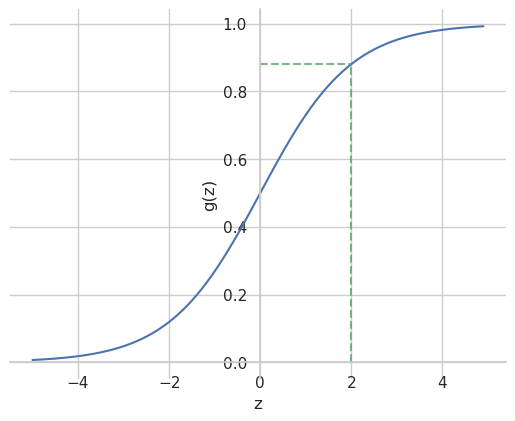

In [2]:
z = np.arange(-5, 5, 0.1)
g = 1 / (1 + np.exp(-z))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position(('data', 0.0))
ax.spines['bottom'].set_position(('data', 0.0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.plot(z, g)
plt.plot([2, 2], [0, (1/(1 + np.exp(-2)))], 'g--', alpha = 0.8)
plt.plot([0, 2], [(1/(1 + np.exp(-2))), (1/(1 + np.exp(-2)))], 'g--', alpha = 0.8)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.show()

##
---

## Hypothesis function

*logistic regression*. 

Given two features, you want to determine some relationship or pattern that maps these features onto a target or label. 

For example, given a mean radius and mean compactness of a tumor,
you want to map those values to either a `1` (benign) or `0` (malignant).

or

For example:

`indepent` Represents the acceleration of one of the study participants in terms of their vertical axis while in the process of laying down.  

`response` If `0`, the subject was performing a different activity. If `1` the subject was performing the lying down activity.  

That is, you want to develop a function of the following form:

$$  y = f(x) $$

This function should predict $y$ given the input features $x$. However, you do not know the function $f(x)$ just yet. So you can refer to it as the *hypothesis function* and denote it as $h(x)$. 

The hypothesis function takes the following form:

$$ h_{\theta}(x) = \theta_0 + \theta_1x_1 + \theta_2x_2$$

The values $\theta_0, \theta_1$, and $\theta_2$ are parameters (sometimes called *weights*) that you tune as you fit the function to the data. The values $x_1$ and $x_2$ are the features. Say, for example, that you have a feature that is strongly correlated with a label. The feature would have more weight or a larger theta ($\theta$) value compared to a feature that isn't a strong predictor. 

Think of $\theta_0$ as some base value that determines if a tumor is malignant or not. This is sometimes called a *bias*. $\theta_1$ is the amount of contribution that the first feature—the mean radius in this case—contributes to the decision. And $\theta_2$ is the amount of contribution of the second feature to the decision. As you might imagine, this can be extended to any number of features, as follows:

$$ h_{\theta}(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \ldots + \theta_nx_n$$

For convenience, define the following vector:

$$\theta = \begin{bmatrix}\theta_0 \\ \theta_1 \\ \theta_2 \\ \vdots \\ \theta_n\end{bmatrix}$$

Also define the following vector:

$$ x = \begin{bmatrix}x_0 \\ x_{1} \\ x_{2} \\ \vdots \\ x_{n} \end{bmatrix} $$

So the hypothesis function may be concisely represented as follows:

$$ h_\theta(x) = \begin{bmatrix}\theta_0  & \theta_1 & \theta_2  & \ldots & \theta_n \end{bmatrix}\begin{bmatrix}x_0 \\ x_{1} \\ x_{2} \\ \vdots \\ x_{n} \end{bmatrix} = \theta^Tx$$

The symbol $\theta^T$ simply means "the transpose of $\theta$". That is, a column vector transposed becomes a row vector, and vice versa. Basic matrix multiplication would show that this concise form of the expression is the same as the original form.

You may have noticed that given $n$ features, you create a vector $x$ of $n+1$ elements. For convenience, assign the value `1` to $x_0$ for all rows of data in the dataset. This makes it easier to perform matrix multiplication between $\theta$ and $x$.

---

We are looking for $y$ to take on the values `0` or `1` and no other value. 

The hypothesis function as given will generate numbers outside of this range. 

This is where the *logistic* part of the logistic regression comes in. 

You take the hypothesis function and pass it through a *logistic function* (also called a *sigmoid function*).

## $ g(z) = \frac{1}{1 + e^{-z}}$


##

In [21]:
## z, a vector of real numbers 

def zigmoid(z):
    return 1 / ( 1 + np.exp(-z))

def prediccion(features, weights):
    z =np.dot(features, weights)
    return zigmoid(z)


Imagine

Sample # |$x_1$ | $x_2$ | target
--- | --- | --- | ---
1 | 0.4 | 1.3 | 1
2 | 0.1 | 0.002 | 0

Running the algorithm generates the model defined by the following:

$$ \theta = \begin{bmatrix} 0.1 \\ -1.2 \\ 0.3 \end{bmatrix} $$

### For sample 1

$$ x^1 = \begin{bmatrix} 1 \\ 0.4 \\ 1.3 \end{bmatrix}$$

So performing $ z= \theta^Tx$ gives the following:

$$ \begin{align*}z & = \begin{bmatrix} 0.1 & -1.2 & 0.3 \end{bmatrix}\begin{bmatrix} 1 \\ 0.4 \\ 1.3 \end{bmatrix} \\ &= 0.1 \times 1 + -1.2 \times 0.4 + 0.3 \times 1.3 \\ &= 0.010\end{align*} $$

Then plotting this on the sigmoid function, you'll have the following:

$$ \begin{align*}g(0.010) & = \frac{1}{1 + e^{-0.010}} \\ &= 0.502 \end{align*}$$

Therefore:

$$ y = 1 \text{ because }  h_\theta(x^1) \ge 0.5 $$ 

### For sample 2

$$ x^2 = \begin{bmatrix} 1 \\ 0.1 \\ 0.002 \end{bmatrix}$$

So performing $z = \theta^Tx$ gives the following:

$$ \begin{align*}z & = \begin{bmatrix} 0.1 & -1.2 & 0.3 \end{bmatrix}\begin{bmatrix} 1 \\ 0.1 \\ 0.002 \end{bmatrix} \\ &= 0.1 \times 1 + -1.2 \times 0.1 + 1.3 \times 0.002 \\ &= -0.019\end{align*} $$

Then plot this on the sigmoid function as follows:

$$ \begin{align*}g(-0.019) & = \frac{1}{1 + e^{--0.019}} \\ &= 0.495 \end{align*}$$

Therefore:

$$ y = 0 \text{ because } h_\theta(x^2) \lt 0.5 $$


For the first sample, the model predicted `1`. For the second sample, the model predicted `0`.




In [22]:
x1 = [1, 0.4, 1.3]
theta = [0.1, -1.2, 0.3]
sample1 = prediccion(x1, theta)

print('For sample 1: ', sample1)

x2 = [1, 0.1, 0.002]
sample2 = prediccion(x2, theta)

print('For sample 2: ', sample2)

For sample 1:  0.502499979166875
For sample 2:  0.49515015210644203


## Side Note:

#### Probability are not the odds of winning or loosing.

#### probability = wanted result / all results

#### odds = wanted result /  unwanted result 

## Cost function
Now that you've seen how you can use the hypothesis function to make some predictions, the next step is to measure the accuracy of the function. If the accuracy is too low, then adjust some parameters and measure the accuracy of the updated function. Repeat this process until you are satisfied with the accuracy or until you simply cannot get better accuracy.

In this section, you will examine the function that you'll use to measure the hypothesis function's accuracy. This is known as the *cost function* or *error function*. 

For a given data sample, you can use the set of features $x$ to calculate the prediction given by your hypothesis function, as you did above, and compare it to the actual label for that sample $y$. If the prediction is different from the actual value of $y$, then you have an error. You then need to perform this for all samples in your training set, and sum the errors for a total error.

The objective of the algorithm is to minimize the error. The cost function used in logistic regression is defined as follows:

$$ cost(h_\theta(x), y) = \begin{cases} -log(h_\theta(x)) & \text{if} & y = 1 \\ -log(1 - h_\theta(x)) & \text{if} & y = 0\end{cases}$$

These two functions are plotted below.

The left graph shows the function $-log(h_\theta(x))$. If $y = 1$ and the hypothesis function returns `1`, the penalty is `0`. But if the hypothesis function returns `0`, the penalty is very large. Similarly, the right side illustrates that if $y = 0$, then a prediction of `1` results in a large penalty, but a prediction of `0` has no penalty.

You can restate that cost function in a single line to make it easier to code.

$$ cost(h_\theta(x), y) = -ylog(h_\theta(x)) - (1 - y)log(1 - h_\theta(x))$$

In the cell below, this is illustrated in code.

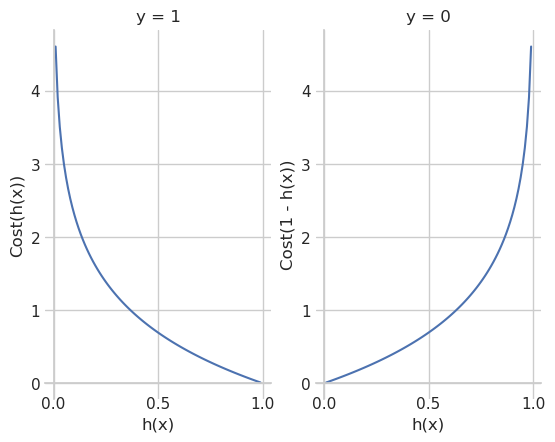

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2)
z = np.arange(0.01, 1, 0.01)
g = -np.log(z)
ax1.spines['left'].set_position(('data', 0.0))
ax1.spines['bottom'].set_position(('data', 0.0))
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.plot(z, g)
ax1.set(xlabel='h(x)', ylabel='Cost(h(x))')
ax1.set_title('y = 1')

g = -np.log(1 - z)
ax2.spines['left'].set_position(('data', 0.0))
ax2.spines['bottom'].set_position(('data', 0.0))
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.plot(z, g)
ax2.set(xlabel='h(x)', ylabel='Cost(1 - h(x))')
ax2.set_title('y = 0')

plt.show()

In [24]:

def cost(pred, y):
  return -y * np.log(pred) - (1 - y) * np.log(1 - pred)

# Prediction is close to 0, y = 0 (small error)
y = 0
pred = 0.00001
print("y = 0, pred close to zero: ", cost(pred, y))

# Prediction is close to 1, y = 0 (large error)
pred = 0.99999
print("y = 0, pred close to one: ", cost(pred, y))

y = 1
pred = 0.00001
# Prediction is close to 0, y = 1 (large error)
print("y = 1, pred close to zero: ", cost(pred, y))

# Prediction is close to 1, y = 1 (small error)
pred = 0.99999
print("y = 1, pred close to one: ", cost(pred, y))



y = 0, pred close to zero:  1.0000050000287824e-05
y = 0, pred close to one:  11.51292546497478
y = 1, pred close to zero:  11.512925464970229
y = 1, pred close to one:  1.0000050000287824e-05


## Logistic regression



In [25]:
df = pd.read_csv('activity.csv')
df.columns = ['independent', 'responce']
df.head(6)

,independent,responce
0,96.229,0
1,84.746,0
2,82.449,0
3,106.560,0
4,80.152,0
5,19.292,1


In [26]:
df.describe()

,independent,responce
count,494.000000,494.000000
mean,45.512363,0.516194
std,44.799360,0.500244
min,-48.459000,0.000000
25%,0.918650,0.000000
50%,41.109500,1.000000
75%,89.339000,1.000000
max,112.310000,1.000000


In [33]:
## missing values?
print(df.isnull().sum().sort_values())

independent    0
responce       0
dtype: int64


In [36]:
## Classes 
df['responce'].value_counts()


1    255
0    239
Name: responce, dtype: int64

In [37]:
## Is the target class balanced?
print('Balance/Unbalance class?')
print(239 / (255 + 239), 'Almost 50/50')
print(f'laying down {1-0.4838}% of the time')

Balance/Unbalance class?
0.48380566801619435 Almost 50/50
laying down 0.5162% of the time


### [`LogisticRegression()`scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [44]:
## Acceleration reading in G for vertical axis `independent`
## laying down or not

X = df[['independent']]
y = df[['responce']]

## Split dataset into training and holdout datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

## Fitting the model to the data, and saving it as a variable clf_lr: classifier logistic regression.
clf_lr = LogisticRegression().fit(X_train, y_train.values.ravel())


### Predicting with test

In [47]:
## Obtaining predictions
y_pred = clf_lr.predict(X_test)

In [54]:
## Obtaining the predictive probabilities
clf_lr.predict_proba(X_test)[::,-1]

array([2.31693308e-02, 9.97511568e-01, 1.04282071e-02, 1.05672351e-03,
       9.99781257e-01, 1.04282071e-02, 4.66017106e-03, 9.95733864e-01,
       9.72343955e-01, 2.31693308e-02, 9.97825589e-01, 1.36212174e-02,
       3.43616982e-02, 9.95733864e-01, 9.98892860e-01, 5.75929752e-02,
       4.77298577e-01, 6.09795092e-03, 9.98732777e-01, 9.92695617e-01,
       3.91403776e-02, 9.31712676e-01, 9.64063419e-01, 1.55638073e-02,
       9.83708329e-01, 1.19195424e-02, 7.55107906e-01, 8.74057100e-01,
       3.43616982e-02, 9.91646273e-01, 1.77763901e-02, 1.19195424e-02,
       9.97152314e-01, 2.64340977e-02, 9.98892860e-01, 1.19195424e-02,
       9.31712676e-01, 9.95119247e-01, 9.00935568e-01, 9.22594161e-01,
       8.39846087e-02, 9.99624389e-01, 1.19195424e-02, 8.01629006e-01,
       5.33106480e-03, 1.36212174e-02, 3.01447030e-02, 3.55976011e-03,
       4.07288328e-03, 1.19195424e-02, 9.98892860e-01, 6.53836704e-02,
       4.07288328e-03, 9.98892860e-01, 9.12067619e-03, 9.53422359e-01,
      

In [56]:
## All the classifier attributes
clf_atributes = clf_lr.__dir__()

### Getting coefficients and plot

In [40]:
clf_lr.coef_

array([[-0.1177466]])

In [41]:
clf_lr.intercept_

array([6.10177895])

<AxesSubplot:xlabel='independent', ylabel='responce'>

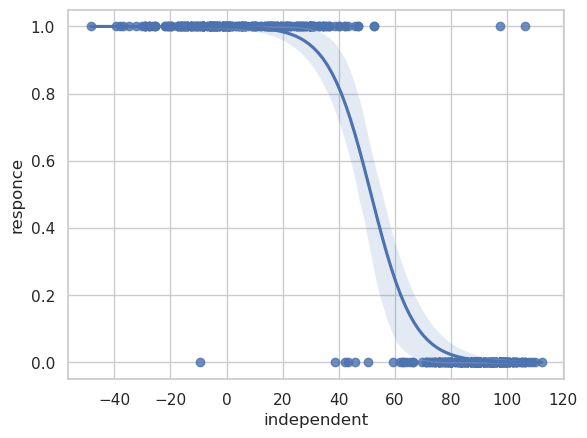

In [42]:
sns.regplot(x='independent', y='responce', data=df, logistic=True)

## Confucion matrix

Used to evaluate classification models.

* **Confusion matrix:** A graphical representation of how accurate a classifier is at predicting the labels for a categorical variable.

To create a confusion matrix, we'll use the [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix) function from the `metrics` module of `scikit-learn`. To use the function, we'll need to input the following:

* Actual labels of the holdout sample, stored as `y_test`
* Predicted labels of the holdout sample, stored as `y_pred`
* The names of the labels, which you can access using `clf.classes_`

**Note:** If there were more classes, we would have more numbers or labels in `clf.classes_`. Since this is a binomial logistic regression, there are only two labels, 0 and 1.

In [58]:
# Calculate the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf_lr.classes_)

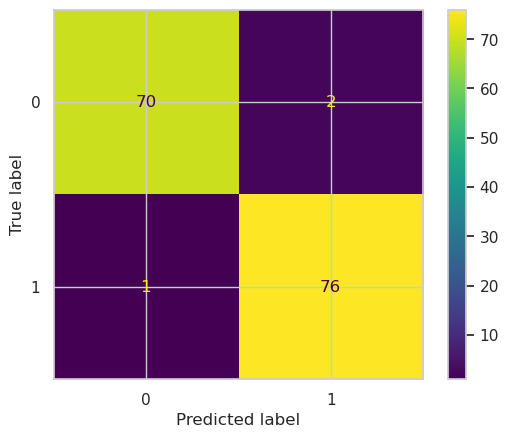

In [61]:
# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf_lr.classes_)
# Display the confusion matrix
disp.plot();

In order to understand and interpret the numbers in the below confusion matrix, it is important to keep the following in mind:

* The upper-left quadrant displays the number of **true negatives**.
* The bottom-left quadrant displays the number of **false negatives**.
* The upper-right quadrant displays the number of **false positives**.
* The bottom-right quadrant displays the number of **true positives**.

We can define the above bolded terms as follows in our given context:
* **True negatives**: The number of people that were not lying down that the model accurately predicted were not lying down.
* **False negatives**: The number of people that were lying down that the model inaccurately predicted were not lying down.
* **False positives**: The number of people that were not lying down that the model inaccurately predicted were lying down.
* **True positives**: The number of people that were lying down that the model accurately predicted were lying down.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.